In [1]:
from keras.datasets import mnist
(train_dataset,train_labels),(test_dataset,test_labels) = mnist.load_data()


print(f'train_dataset : {train_dataset.shape}')
print(f'test_dataset : {test_dataset.shape}')
print(f'train_labels : {train_labels.shape}')
print(f'test_labels : {test_labels.shape}')


11490434/11490434 [==============================] - 0s 0us/step
train_dataset : (60000, 28, 28)
test_dataset : (10000, 28, 28)
train_labels : (60000,)
test_labels : (10000,)


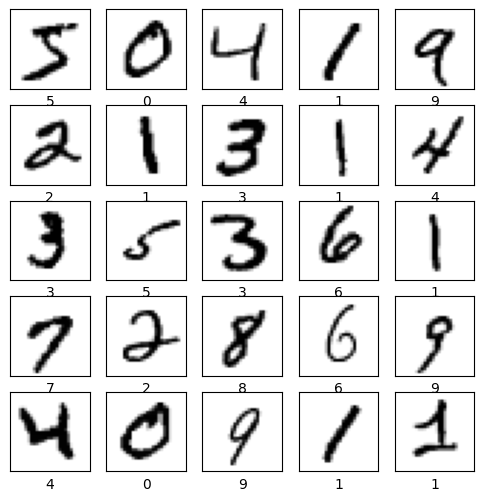

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [2]:



import matplotlib.pyplot as plt
import math
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(6,6))

for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_dataset[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()


import pandas as pd
pd.DataFrame(train_dataset[0])


In [3]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Dense, Flatten
from keras.models import Sequential



def build_model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model


model = build_model()
model.summary()
#from tensorflow.keras.utils import plot_model
#plot_model(model,show_shapes = True, show_layer_names = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [4]:
from tensorflow import keras
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [5]:
import datetime
from keras.callbacks import TensorBoard
log_dir = ".log/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)


from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

history = model.fit(train_dataset,train_labels, epochs = 10, validation_data = (test_dataset,test_labels),batch_size = 128, callbacks = [tensorboard_callback])


Epoch 1/10
469/469 [==============================] - 13s 11ms/step - loss: 0.5111 - accuracy: 0.9322 - val_loss: 0.0615 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0536 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0478 - val_accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0580 - val_accuracy: 0.9858
Epo

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9866
Validation loss: 0.06257526576519012
Validation accuracy: 0.9865999817848206


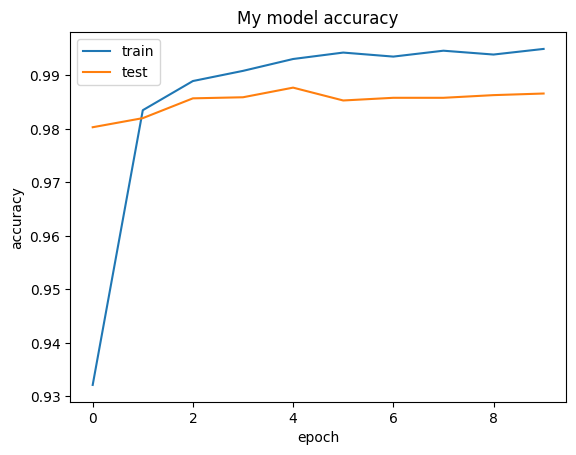

In [6]:
import numpy as np
validation_loss, validation_accuracy = model.evaluate(test_dataset,test_labels)
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('My model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



In [7]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name,save_format = 'h5')
from keras.models import load_model
loaded_model = load_model(model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step


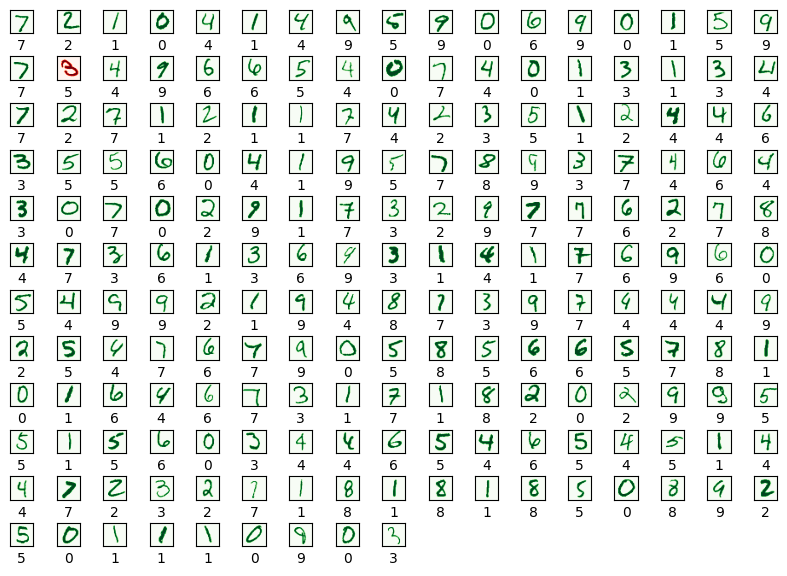

In [8]:
import numpy as np
predictions = loaded_model.predict([test_dataset])
prediction_results = np.argmax(predictions, axis = 1)



number_to_display = 196
num_cells = 17
plt.figure(figsize = (10,10))


(train_dataset,train_labels),(test_dataset,test_labels) = mnist.load_data()

for i in range(number_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)



    color_map = 'Greens' if prediction_results[i] == test_labels[i] else 'Reds'
    plt.imshow(test_dataset[i], cmap = color_map)
    plt.xlabel(prediction_results[i])

plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.show()



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.96      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:


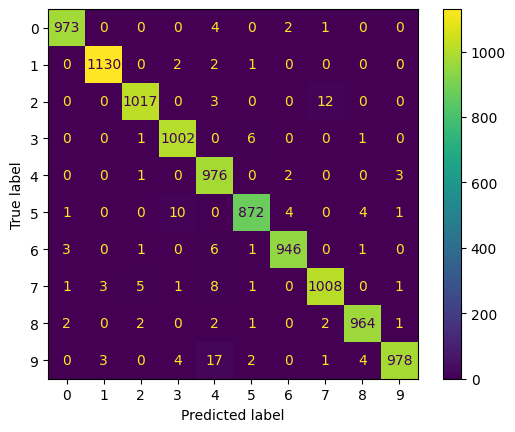

In [9]:



from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics



print(classification_report(test_labels, prediction_results))


print("Confusion Matrix:")
cm = confusion_matrix(test_labels, prediction_results)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
